In [2]:
import numpy as np
import time
import scipy.signal as signal
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

In [3]:
#Sample data
#x = np.linspace(0.0, 0.75, 600, endpoint=False)
#y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)

x = np.linspace(0, 999, 1000)
y = np.sin(x) + np.random.rand(len(x))*2

time = np.arange(0, 20, 1/100)
theta = 0

sinewave = 1 * np.sin(2 * np.pi * 1 * time + theta) + np.sin(2* np.pi * 10 * time + np.pi)

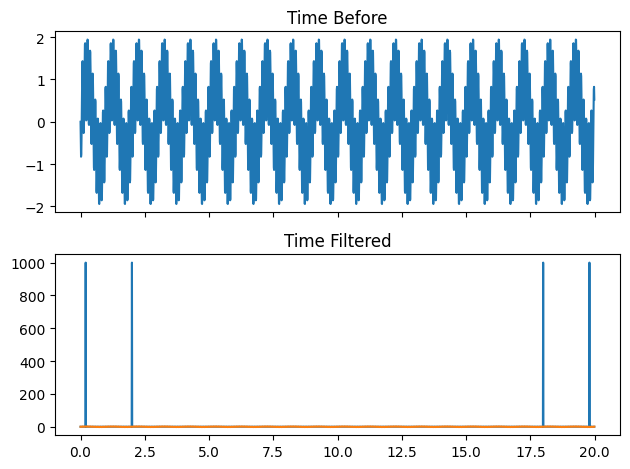

[ 1.22464680e-16 -5.24994733e-01 -8.25723283e-01 ...  7.63675202e-01
  8.25723283e-01  5.24994733e-01]


In [5]:
def fft_filter(data, min_frq, max_frq, N):
    data_fft = fft(data)
    #b, a = signal.butter(N, [min_frq, max_frq], 'band', analog = False, output = 'ba', fs = 100)
    #filtered = signal.lfilter(b, a, data_fft)
    filtered = data_fft

    fig, (ax1, ax3) = plt.subplots(2, 1, sharex=True) #Sampled at 1 kHz

    ax1.plot(time, data)
    ax1.set_title('Time Before')

    plt.plot(time, abs(filtered))
    #set_title('Frequency')

    data_ifft = ifft(filtered)

    ax3.plot(time, (data_ifft))
    ax3.set_title('Time Filtered')
    plt.tight_layout()
    plt.show()
    
    #return data_ifft

fft_filter(sinewave, 0.5, 5, 3)

print(sinewave)

In [7]:
#%%timeit
def fft_filter(data, min_frq, max_frq, N):
    data_fft = fft(data)
    b, a = signal.butter(N, [min_frq, max_frq], 'band', analog = False, output = 'ba', fs = 100)
    filtered = signal.lfilter(b, a, data_fft)
    data_ifft = ifft(abs(filtered))
    return data_ifft

fft_filter(y, 0.5, 5, 4)

array([ 7.76643779e+00-0.00000000e+00j,  2.68440149e+00+6.46460197e-01j,
        6.88790692e-01+4.58565115e-01j, -1.04094722e-01+1.46809636e-01j,
        5.68639585e-01+4.51607962e-01j,  1.26044435e+00+9.84651318e-01j,
        1.41131710e+00+1.14968502e+00j,  1.30397711e+00+1.38762290e+00j,
        7.50414530e-01+7.24811232e-01j,  1.40648102e-02+7.24560501e-02j,
       -1.75151203e-01-9.86496572e-03j,  9.07567222e-02+7.10945361e-01j,
        5.08846994e-01+1.73330522e+00j,  5.67169103e-01+2.07671441e+00j,
        2.34023617e-01+1.51670922e+00j, -6.43467184e-02+4.80882920e-01j,
       -5.20546318e-02+1.65794253e-01j, -1.34672101e-01+5.95335857e-01j,
       -4.18819748e-01+1.53876747e+00j, -4.68601689e-01+1.35565534e+00j,
       -5.16295895e-01+7.53045256e-01j, -5.05390237e-01+4.71169948e-01j,
       -1.88636213e-01-3.84010400e-02j, -3.85626290e-01+4.84889137e-01j,
       -5.75011091e-01+2.35500067e-01j, -8.13329438e-01+1.81484256e-01j,
       -7.93839326e-01+1.11417167e-01j, -2.82573022